In [0]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c cifar-10


-rw-r--r-- 1 root root 63 Aug 20 04:34 kaggle.json
  0% 0.00/3.04M [00:00<?, ?B/s]
100% 3.04M/3.04M [00:00<00:00, 103MB/s]
100% 610M/610M [00:11<00:00, 62.2MB/s]

100% 105M/105M [00:07<00:00, 11.1MB/s] 

  0% 0.00/575k [00:00<?, ?B/s]
100% 575k/575k [00:00<00:00, 169MB/s]


In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('/content/trainLabels.csv')

In [0]:
data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
id       50000 non-null int64
label    50000 non-null object
dtypes: int64(1), object(1)
memory usage: 781.3+ KB


In [0]:
!p7zip -d train.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 109723070 bytes (105 MiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2%      2% 672 - train/10602.png                            2% 1106 - train/10994.png                             2% 1423 - train/11279.png                             2% 1688 - train/11517.png                             4% 1868 - train/1168.png                          

In [0]:
import os
k = os.listdir('/content/train')

In [0]:
k[0]

'32677.png'

In [0]:
list1 = []
for i in range(50000):
    list1.append(str(i+1))

In [0]:
new_list = []
for j in list1:
    new_list.append(j+'.png')

In [0]:
new_list[0]

'1.png'

In [0]:
dict1 = {'image':new_list }
df = pd.DataFrame(dict1)

In [0]:
df.head()

,image
0,1.png
1,2.png
2,3.png
3,4.png
4,5.png


In [0]:
data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [0]:
data['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [0]:
img1 = cv2.imread('/content/train/'+new_list[3],1)

In [0]:
img1.shape

(32, 32, 3)

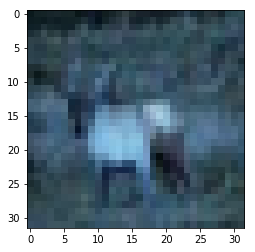

In [0]:
plt.imshow(img1,interpolation='nearest')
plt.show()

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 5s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
y_test[36]

array([4])

# frog=6,ship=8,car=1,cat=3,plane=0,truck=9,dog=5,horse=7,deer=4,bird=2

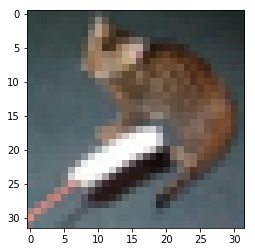

In [0]:
plt.imshow(x_test[106],interpolation='nearest')
plt.show()

In [0]:
type_obj = {'frog': 6,'truck': 9,'deer': 4,'automobile': 1,'bird': 2,'horse': 7,'ship': 8,'cat': 3,'dog': 5,'airplane': 0}

In [0]:
data.label = [type_obj[item] for item in data.label] 


In [0]:
data['label'].unique()

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0])

In [0]:
data.head()

,id,label
0,1,6
1,2,9
2,3,9
3,4,4
4,5,1


In [0]:
data1 = data.drop(['id'],axis = 1)

In [0]:
data1.head()

,label
0,6
1,9
2,9
3,4
4,1


In [0]:
train_data = pd.concat([df,data1],axis=1)

In [0]:
train_data.head()

,image,label
0,1.png,6
1,2.png,9
2,3.png,9
3,4.png,4
4,5.png,1


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
image    50000 non-null object
label    50000 non-null int64
dtypes: int64(1), object(1)
memory usage: 781.3+ KB


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data1 = ImageDataGenerator(rescale=1./255)

test_data1 = ImageDataGenerator(rescale=1./255)


train_generator = train_data1.flow_from_dataframe(
    dataframe=train_data,
    directory='/content/train',
    x_col='image',
    y_col='label',
    target_size=(32,32),
    batch_size=250,
    class_mode="other")

Found 50000 validated image filenames.


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
  
img_input = layers.Input(shape=(32,32,3))

x = Conv2D(64,3,activation="relu",data_format='channels_last',padding='same')(img_input)
x = MaxPooling2D(2)(x)
x = BatchNormalization()(x)

x = Conv2D(128,3,activation="relu",data_format='channels_last',padding='same')(x)
x = MaxPooling2D(2)(x)
x = BatchNormalization()(x)

x = Conv2D(256,3,activation="relu",data_format='channels_last',padding='same')(x)
x = MaxPooling2D(2)(x)
x = BatchNormalization()(x)


x = Flatten()(x)

x = Dense(128,activation="relu")(x)
x = BatchNormalization()(x)

x = Dense(256,activation="relu")(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Dense(512,activation="relu")(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

output = Dense(10,activation = "softmax")(x)

model = Model(img_input,output)

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),
              metrics=['accuracy'])

In [0]:
model.fit_generator(train_data1.flow(x_train,y_train,batch_size = 250),
                        steps_per_epoch=50,
                        epochs=50,
                        validation_data=(test_data1.flow(x_test, y_test, batch_size=100)),
                        validation_steps=100,
                        verbose = 2)

Epoch 1/50
50/50 - 7s - loss: 2.2010 - acc: 0.2858 - val_loss: 2.4730 - val_acc: 0.1046
Epoch 2/50
50/50 - 4s - loss: 1.7056 - acc: 0.4093 - val_loss: 3.0442 - val_acc: 0.1125
Epoch 3/50
50/50 - 4s - loss: 1.4618 - acc: 0.4870 - val_loss: 4.4787 - val_acc: 0.1000
Epoch 4/50
50/50 - 4s - loss: 1.3364 - acc: 0.5337 - val_loss: 5.5608 - val_acc: 0.1000
Epoch 5/50
50/50 - 4s - loss: 1.2006 - acc: 0.5727 - val_loss: 5.9816 - val_acc: 0.1001
Epoch 6/50
50/50 - 4s - loss: 1.1302 - acc: 0.5966 - val_loss: 4.5330 - val_acc: 0.1593
Epoch 7/50
50/50 - 3s - loss: 1.0879 - acc: 0.6150 - val_loss: 5.2038 - val_acc: 0.1699
Epoch 8/50
50/50 - 4s - loss: 1.0604 - acc: 0.6303 - val_loss: 4.7199 - val_acc: 0.1413
Epoch 9/50
50/50 - 4s - loss: 0.9653 - acc: 0.6625 - val_loss: 3.9035 - val_acc: 0.1594
Epoch 10/50
50/50 - 4s - loss: 0.9314 - acc: 0.6749 - val_loss: 2.5033 - val_acc: 0.2968
Epoch 11/50
50/50 - 4s - loss: 0.9098 - acc: 0.6782 - val_loss: 1.7985 - val_acc: 0.4196
Epoch 12/50
50/50 - 4s - loss:

In [0]:
model.fit_generator(train_generator,
                    steps_per_epoch=200,
                    epochs=50,
                    validation_data=(test_data1.flow(x_test, y_test, batch_size=100)),
                    validation_steps=100,
                    verbose = 2)

Epoch 1/50
200/200 - 14s - loss: 0.1360 - acc: 0.9547 - val_loss: 1.1981 - val_acc: 0.7497
Epoch 2/50
200/200 - 14s - loss: 0.1351 - acc: 0.9551 - val_loss: 1.2145 - val_acc: 0.7500
Epoch 3/50
200/200 - 14s - loss: 0.1305 - acc: 0.9555 - val_loss: 1.2218 - val_acc: 0.7515
Epoch 4/50
200/200 - 14s - loss: 0.1285 - acc: 0.9568 - val_loss: 1.2268 - val_acc: 0.7519
Epoch 5/50
200/200 - 14s - loss: 0.1224 - acc: 0.9591 - val_loss: 1.2172 - val_acc: 0.7522
Epoch 6/50
200/200 - 15s - loss: 0.1247 - acc: 0.9585 - val_loss: 1.2387 - val_acc: 0.7540
Epoch 7/50
200/200 - 15s - loss: 0.1211 - acc: 0.9598 - val_loss: 1.2444 - val_acc: 0.7520
Epoch 8/50
200/200 - 14s - loss: 0.1177 - acc: 0.9608 - val_loss: 1.2424 - val_acc: 0.7532
Epoch 9/50
200/200 - 14s - loss: 0.1205 - acc: 0.9600 - val_loss: 1.2516 - val_acc: 0.7510
Epoch 10/50
200/200 - 14s - loss: 0.1188 - acc: 0.9606 - val_loss: 1.2486 - val_acc: 0.7549
Epoch 11/50
200/200 - 14s - loss: 0.1162 - acc: 0.9617 - val_loss: 1.2545 - val_acc: 0.75